In [1]:
import pandas as pd # pandas k nacitani dat z excelu
import numpy as np # numpy pro vypocty
import matplotlib.pyplot as plt # vykreslovani grafu
import math
from gaussovsky_svazek import hustota_vykonu, polomer_svazku

In [2]:
wattmetr_1 = pd.read_excel("data_06.xlsx", sheet_name="wattmetr", engine="openpyxl", skiprows=1, usecols="B, C, D", nrows=17)
wattmetr_2 = pd.read_excel("data_06.xlsx", sheet_name="wattmetr", engine="openpyxl", skiprows=1, usecols="G, H, I", nrows=17)
fotodioda_1 = pd.read_excel("data_06.xlsx", sheet_name="fotodioda", engine="openpyxl", skiprows=1, usecols="B, C, D", nrows=20)
fotodioda_2 = pd.read_excel("data_06.xlsx", sheet_name="fotodioda", engine="openpyxl", skiprows=1, usecols="G, H, I", nrows=22)

Požadované výsledky:
1. Schéma uspořádání rezonátoru mikročipového laseru Nanolase.
2. Tabulka naměřených hodnot parametrů laseru Nanolase (Ep, Pp, Pstr, f, Tp) a jejich porovnání s hodnotami z technické specifikace.

In [6]:
P_str = 15 # střední výkon [mW]
T_p = 2.3 # délka pulsu [ns]
T_p_katalogova = 0.81 # [ns]
f = 6.07 #opakovací frekvence [kHz]
E_p = P_str*10**(-3)/(f*10**3)
print(f"Energie pulsu: {E_p*10**6} \\mu J")
P_p_katalogova = E_p*10**(-3)/(T_p_katalogova*10**(-9))
P_p = E_p*10**(-3)/(T_p*10**(-9))
print(f"Špičkový výkon dle katalogu: {P_p_katalogova} W")
print(f"Špičkový výkon: {P_p} W")

Energie pulsu: 2.4711696869851725 \mu J
Špičkový výkon dle katalogu: 3.050826774055768 W
Špičkový výkon: 1.0744216030370317 W


3. Tabulka naměřených hodnot transmitance daných dvou vzorků.

4. Grafy nelineární transmitance daných vzorků pro oba detektory. Na ose x uveďte vzdálenost od fokusační čočky a vypočtené hodnoty hustoty dopadajícího výkonu. 

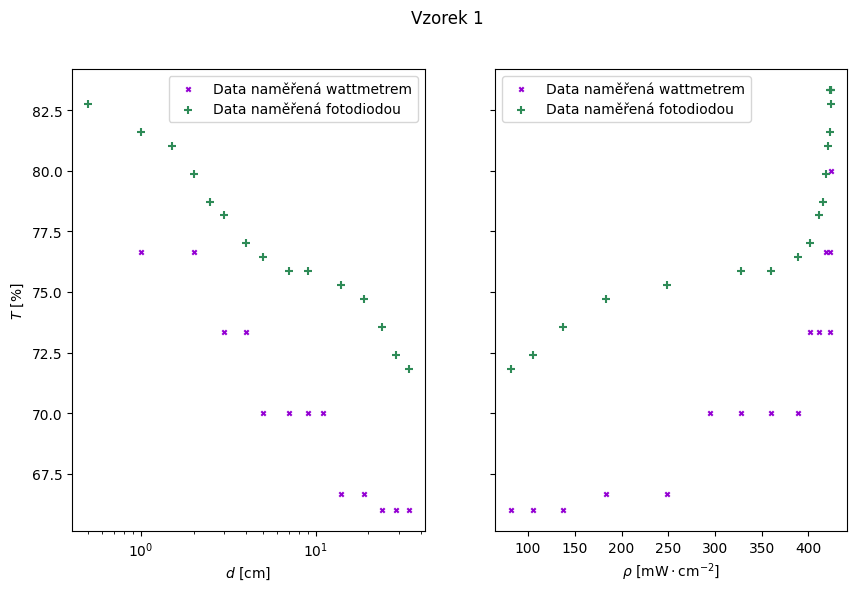

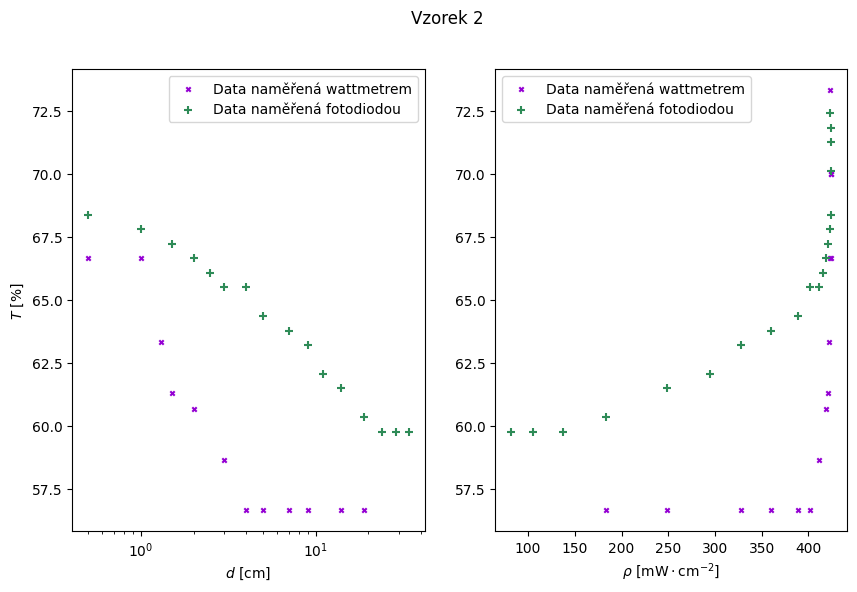

In [ ]:
w_0 = 75*10**(-3) # poloměr svazku v ohnisku [cm]
M = 1  # parametr kvality Gaussovského svazku
lam = 1064*10**(-6) # vlnová délka [cm]
b = 2*math.pi*w_0**2 / (M**2*lam) # konfokální parametr
z_0 = b/2 # Rayleighova vzdálenost

hustota_vzorek1_wattmetr = hustota_vykonu(wattmetr_1["d [cm]"], P_str, w_0, z_0)
hustota_vzorek1_fotodioda = hustota_vykonu(fotodioda_1["d [cm]"], P_str, w_0, z_0)

hustota_vzorek2_wattmetr = hustota_vykonu(wattmetr_2["d [cm].1"], P_str, w_0, z_0)
hustota_vzorek2_fotodioda = hustota_vykonu(fotodioda_2["d [cm].1"], P_str, w_0, z_0)

fig_vzorek1, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig_vzorek1.set_figheight(6)
fig_vzorek1.set_figwidth(10)
fig_vzorek1.suptitle("Vzorek 1")
ax1.scatter(x=wattmetr_1["d [cm]"], y=wattmetr_1["T [%]"],
            marker="x", color="darkviolet", s=10,
            label="Data naměřená wattmetrem")
ax1.scatter(x=fotodioda_1["d [cm]"], y=fotodioda_1["T [%]"],
            marker="+", color="seagreen",
            label="Data naměřená fotodiodou")

ax1.set_xscale('log')
ax1.legend()
ax1.set_xlabel("$d~\\mathrm{{[cm]}}$")
ax1.set_ylabel("$T~\\mathrm{{[\%]}}$")

ax2.scatter(x=hustota_vzorek1_wattmetr, y=wattmetr_1["T [%]"],
            marker="x", color="darkviolet", s=10,
            label="Data naměřená wattmetrem")
ax2.scatter(x=hustota_vzorek1_fotodioda, y=fotodioda_1["T [%]"],
            marker="+", color="seagreen",
            label="Data naměřená fotodiodou")

ax2.set_xscale('log')
ax2.legend()
ax2.set_xlabel("$\\rho~\\mathrm{{[mW\\cdot cm^{-2}]}}$")
#ax2.set_ylabel("$T~\\mathrm{{[\%]}}$")
plt.savefig(".\img\\vzorek1.pdf")

fig_vzorek2, (ax1, ax2) = plt.subplots(1,2)
fig_vzorek2.set_figheight(6)
fig_vzorek2.set_figwidth(10)
fig_vzorek2.suptitle("Vzorek 2")
ax1.scatter(x=wattmetr_2["d [cm].1"], y=wattmetr_2["T [%].1"],
            marker="x", color="darkviolet", s=10,
            label="Data naměřená wattmetrem")
ax1.scatter(x=fotodioda_2["d [cm].1"], y=fotodioda_2["T [%].1"],
            marker="+", color="seagreen",
            label="Data naměřená fotodiodou")
ax1.set_xscale('log')
ax1.legend()
ax1.set_xlabel("$d~\\mathrm{{[cm]}}$")
ax1.set_ylabel("$T~\\mathrm{{[\%]}}$")

ax2.scatter(x=hustota_vzorek2_wattmetr, y=wattmetr_2["T [%].1"],
            marker="x", color="darkviolet", s=10,
            label="Data naměřená wattmetrem")
ax2.scatter(x=hustota_vzorek2_fotodioda, y=fotodioda_2["T [%].1"],
            marker="+", color="seagreen",
            label="Data naměřená fotodiodou")
ax2.set_xscale('log')
ax2.legend()
ax2.set_xlabel("$\\rho~\\mathrm{{[mW\\cdot cm^{-2}]}}$")
#ax2.set_ylabel("$T~\\mathrm{{[\%]}}$")
plt.savefig(".\img\\vzorek2.pdf")

5. Hodnoty saturační intenzity, nesaturovatelných ztrát a hloubky modulace pro oba vzorky.


6. Tabulka hodnot poloměru svazku a hustoty výkonu dopadajícího na vzorek v krčku, ve vzdálenosti z0, 10 cm a 30 cm.

In [5]:
vzd = np.array([z_0, 10, 30])
polom = polomer_svazku(w_0, z_0, vzd)
hustota = hustota_vykonu(vzd, P_str, w_0, z_0)
print(vzd)
print(polom)
print(hustota)

[16.60851379 10.         30.        ]
[0.10606602 0.08754545 0.15484783]
[212.20659079 311.49010306  99.5637323 ]
